In [1]:
# from utils.json2numpy import json2numpy
# json2numpy("dataset/train.json", "dataset/train/imgs", "dataset/train/masks")
# json2numpy("dataset/test.json", "dataset/test/imgs", "dataset/test/masks")

In [2]:
import cv2
import glob
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from utils.compute_iou import compute_ious
from main import segment_fish

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
len(img_paths)

5

In [4]:
# import cv2
# import numpy as np

# def nothing(x):
#     pass

# def vconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
#     w_min = min(im.shape[1] for im in im_list)
#     im_list_resize = [cv2.resize(im, (w_min, int(im.shape[0] * w_min / im.shape[1])), interpolation=interpolation)
#                       for im in im_list]
#     return cv2.vconcat(im_list_resize)

# # Load images
# images = [cv2.imread(img_path) for img_path in img_paths]
# # Create a window
# cv2.namedWindow('image')

# # Create trackbars for color change
# # Hue is from 0-179 for Opencv
# cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
# cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
# cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
# cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
# cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
# cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# # Set default value for Max HSV trackbars
# cv2.setTrackbarPos('HMax', 'image', 179)
# cv2.setTrackbarPos('SMax', 'image', 255)
# cv2.setTrackbarPos('VMax', 'image', 255)

# # Initialize HSV min/max values
# hMin = sMin = vMin = hMax = sMax = vMax = 0
# phMin = psMin = pvMin = phMax = psMax = pvMax = 0

# while(1):
#     # Get current positions of all trackbars
#     hMin = cv2.getTrackbarPos('HMin', 'image')
#     sMin = cv2.getTrackbarPos('SMin', 'image')
#     vMin = cv2.getTrackbarPos('VMin', 'image')
#     hMax = cv2.getTrackbarPos('HMax', 'image')
#     sMax = cv2.getTrackbarPos('SMax', 'image')
#     vMax = cv2.getTrackbarPos('VMax', 'image')

#     # Set minimum and maximum HSV values to display
#     lower = np.array([hMin, sMin, vMin])
#     upper = np.array([hMax, sMax, vMax])

#     # Convert to HSV format and color threshold
#     results = list()
#     for img in images:
#         hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#         mask = cv2.inRange(hsv, lower, upper)
#         result = cv2.bitwise_and(img, img, mask=mask)
#         results.append(result)
    
#     numpy_vertical_concat = vconcat_resize_min(results)
#     # Print if there is a change in HSV value
#     if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
#         print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
#         phMin = hMin
#         psMin = sMin
#         pvMin = vMin
#         phMax = hMax
#         psMax = sMax
#         pvMax = vMax

#     # Display result image
#     cv2.imshow('image', numpy_vertical_concat)
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

# cv2.destroyAllWindows()

(600, 600) 0.891400461557148


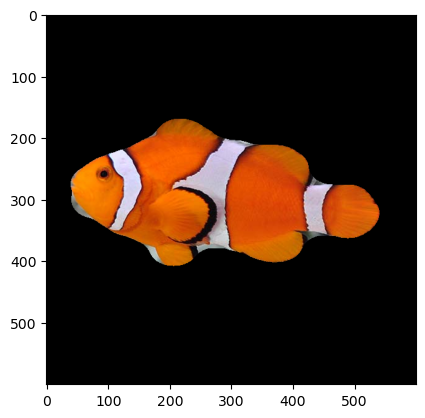

(450, 600) 0.8853340403765575


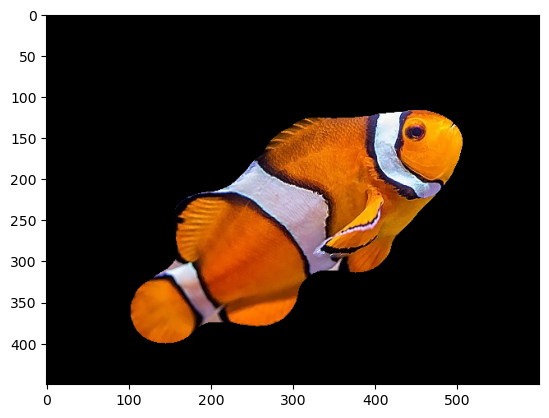

(436, 640) 0.8265361995442985


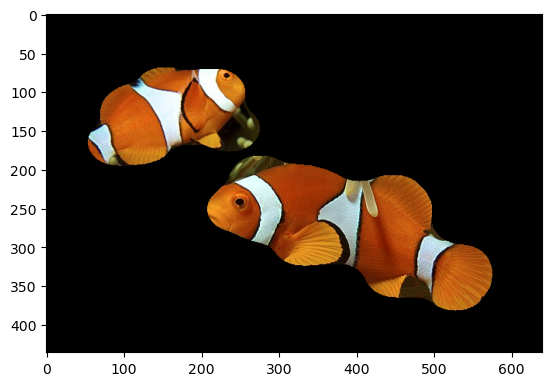

(793, 1200) 0.8056248866332892


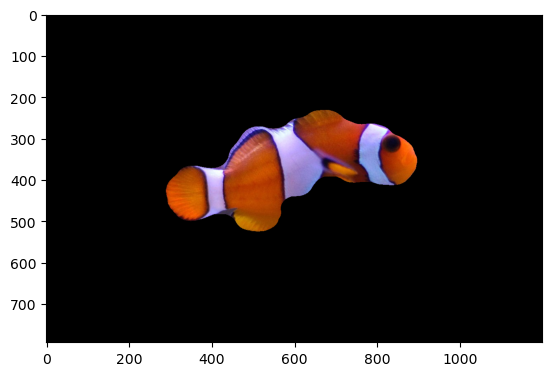

(845, 1200) 0.8041670496731872


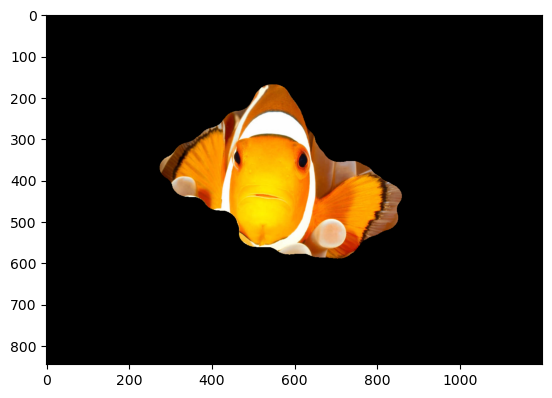

0.8426125275568961

In [5]:
masks = dict()
ious = []
for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    ious.append(compute_ious(masks, osp.join("dataset", "train", "masks")))
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,None], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()
np.mean(ious)